# Navigation

---.

If you would like to use this coding environment to train agents for your project, you are welcome to do so. Please follow the steps below.

### 1. Start the environment.

Run the following code cell to install some packages. It will take a few minutes to run this line!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.14 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


環境には **_brains_** が含まれており、これらは関連するエージェントの行動を決定する役割を担っています。ここでは、利用可能な最初のブレインをチェックし、Pythonから制御するデフォルトのブレインとして設定します。

In [3]:
# デフォルトの脳を取得する
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the state and action space

Run the following code cell to display information about the environment.

In [4]:
# 環境をリセットします
env_info = env.reset(train_mode=True)[brain_name]

# 環境にいるエージェントの数
print('Number of agents:', len(env_info.agents))

# アクションの数
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# 状態空間を調べる 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Acting randomly in the environment

In the following code cell, we will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment** the agent cannot be monitored during training, so you need to set `train_mode=True` and restart the environment!。

In [17]:
env_info = env.reset(train_mode=True)[brain_name] # 環境をリセットします
state = env_info.vector_observations[0]            # 現在の状態を取得します
score = 0                                          # スコアを初期化する

    
print("Score: {}".format(score))


Score: 0


終了したら環境を閉じます。

In [7]:
env.close()

### 4. It's your turn!

4. Now it's your turn! It's your turn to train your own agents to solve environmental problems. A few important notes**.
- When training the environment, make sure that you set `train_mode=True` and that the line to reset the environment looks like this
The line to reset the environment will look like this: ``python
env_info = env.reset(train_mode=True)[brain_name].
````
- To configure your work, you can work directly in this Jupyter notebook, or you can start over with a new file. The list of files in the workspace can be seen by clicking **_Jupyter_** in the upper left corner of the notebook.
- In our coding environment, we cannot see the agent while it is training. However, after training **_after the agent_**, you can download the saved model weights and view the agent on your own machine! 

In [6]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
env_info = env.reset(train_mode=True)[brain_name]

In [9]:
from dqn_agent import Agent
agent = Agent(state_size = 37,action_size=4,seed=0)
state = env_info.vector_observations[0]            # get 
score = 0                                          #initialize 

In [18]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    
    for i_episode in range(1, n_episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name]   # reset the environment for each episode
        state = env_info.vector_observations[0]             # get the current state
        score = 0                                           # initialize the score

        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]               # send the action to the environment
            next_state = env_info.vector_observations[0]          # get the next state         
            reward = env_info.rewards[0]                          # get the reward
            done = env_info.local_done[0]                         # check if episode is done

            score += reward                                       # update the score

            agent.step(state, action, reward, next_state, done)

            state = next_state
            
            if done:
                break
                
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        
        print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(scores_window):.2f}', end="")

        if i_episode % 100 == 0:
            print(f'\rEpisode {i_episode}\tAverage: {np.mean(scores_window):.2f}')
 
    torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')

                  
    return scores

Episode 100	Average: 1.66: 1.66
Episode 200	Average: 5.95: 5.95
Episode 300	Average: 9.59: 9.59
Episode 400	Average: 10.14 10.14
Episode 500	Average: 12.56 12.56
Episode 600	Average: 14.10 14.10
Episode 700	Average: 13.98 13.98
Episode 800	Average: 14.57 14.57
Episode 900	Average: 15.51 15.51
Episode 1000	Average: 15.88 15.88
Episode 1100	Average: 15.75 15.75
Episode 1200	Average: 15.51 15.51
Episode 1300	Average: 15.06 15.06
Episode 1400	Average: 15.13 15.13
Episode 1500	Average: 15.78 15.78
Episode 1600	Average: 15.63 15.63
Episode 1700	Average: 15.25 15.25
Episode 1800	Average: 15.53 15.53
Episode 1900	Average: 15.67 15.67
Episode 2000	Average: 15.76 15.76


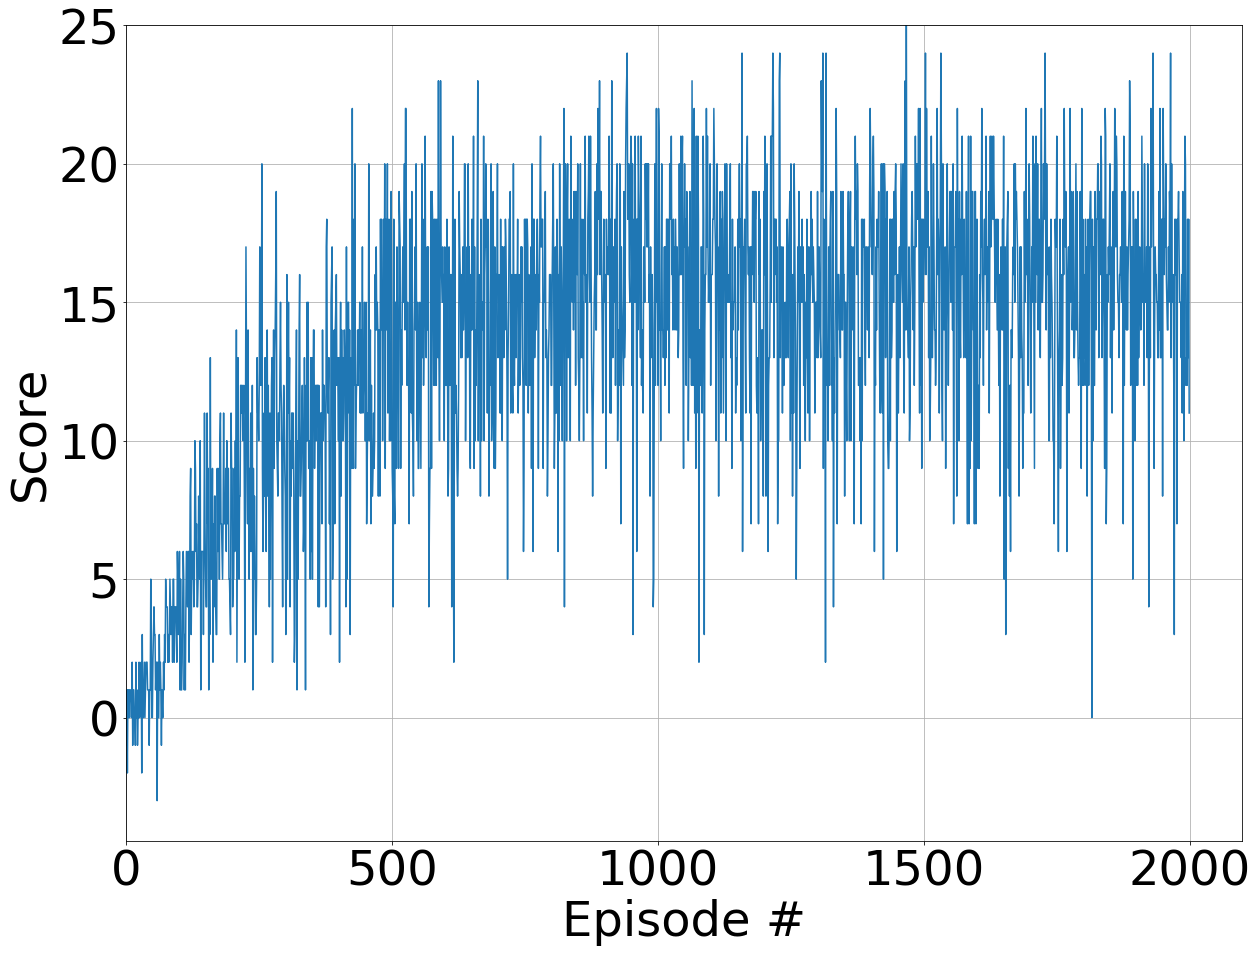

In [19]:
scores = dqn()

# plot the scores
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
bottom, top = plt.ylim()
plt.ylim(bottom, 25)
plt.xlabel('Episode #')
left, right = plt.xlim()
plt.xlim(0, right)
plt.grid(True)
plt.rcParams.update({'font.size': 50})

plt.show()

In [20]:
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))


In [21]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score

while True:
    action = agent.act(state)                      # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    
    score += reward                                # update the score
    
    agent.step(state, action, reward, next_state, done)
    
    state = next_state
    
    if done:                                       # exit loop if episode finished
        break
    
print(f'score: {score}')

score: 21.0
